In [1]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

In [5]:
# Dataset URLs
iris_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
mall_url = 'https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv'


# Load Datasets
iris_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(iris_url, header=None, names=iris_cols)
mall = pd.read_csv(mall_url)


print('Iris shape:', iris.shape)
print('Mall shape:', mall.shape)

Iris shape: (150, 5)
Mall shape: (200, 5)


       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


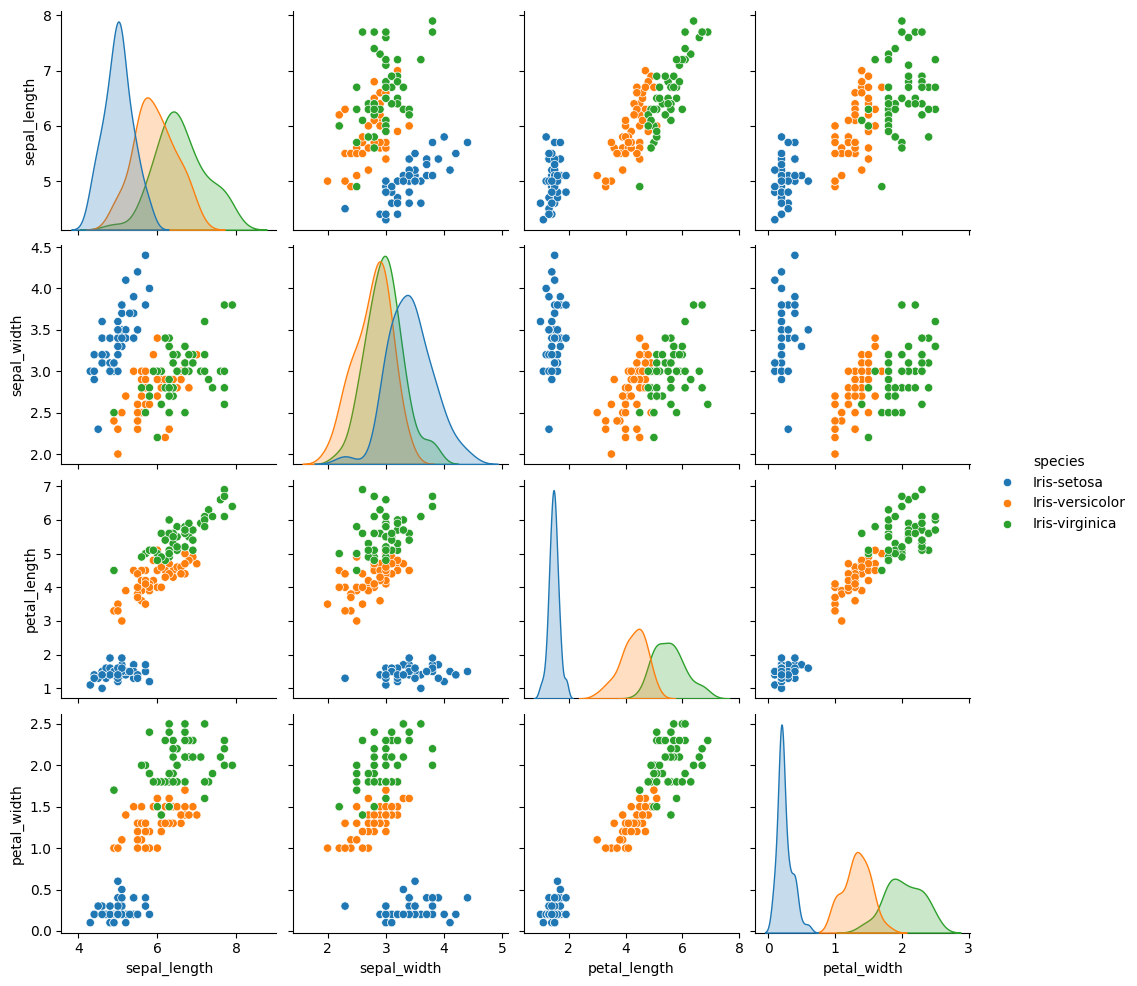

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


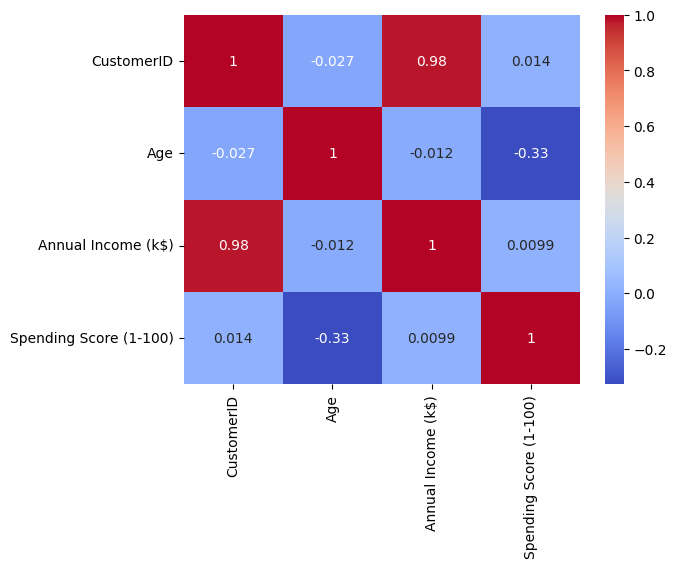

In [6]:
# EDA for Iris Dataset
print(iris.describe())
sns.pairplot(iris, hue='species')
plt.show()


# EDA for Mall Dataset
print(mall.describe())
sns.heatmap(mall.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

In [7]:
# Drop non-numeric columns for clustering
iris_features = iris.drop('species', axis=1)
mall_features = mall.select_dtypes(include=[np.number])


# Standardize
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_features)
mall_scaled = scaler.fit_transform(mall_features)

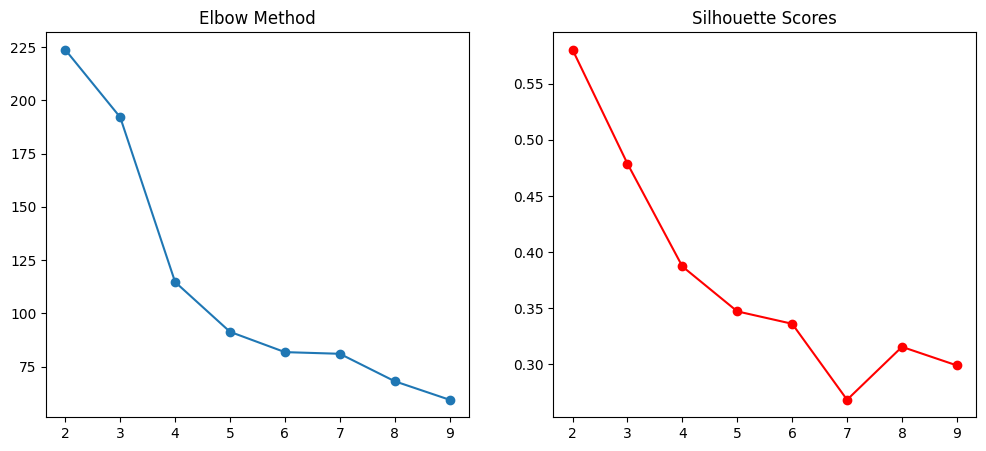

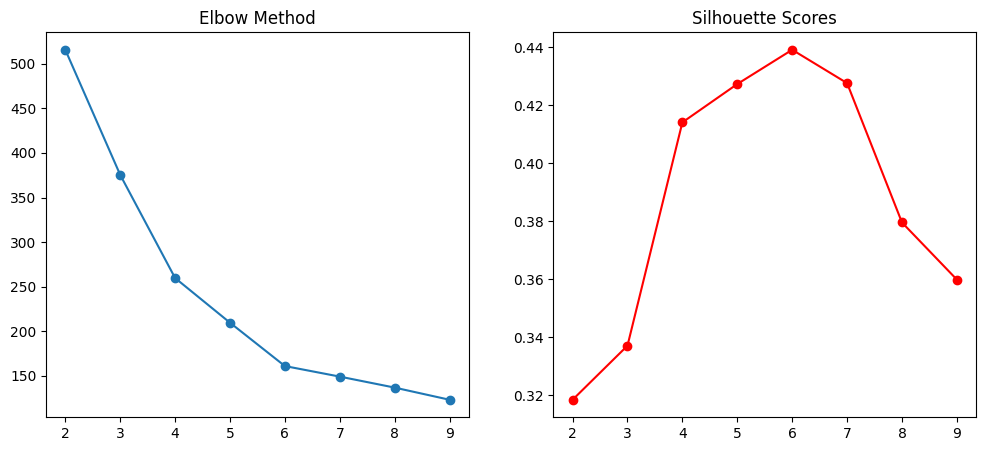

In [9]:
def optimal_k(data):
    inertia = []
    sil = []
    K = range(2, 10)
    for k in K:
        model = KMeans(n_clusters=k, random_state=42)
        model.fit(data)
        inertia.append(model.inertia_)
        sil.append(silhouette_score(data, model.labels_))


    fig, ax1 = plt.subplots(1, 2, figsize=(12, 5))
    ax1[0].plot(K, inertia, marker='o')
    ax1[0].set_title('Elbow Method')
    ax1[1].plot(K, sil, marker='o', color='red')
    ax1[1].set_title('Silhouette Scores')
    plt.show()


optimal_k(iris_scaled)
optimal_k(mall_scaled)

In [10]:
# Final KMeans with optimal k (from graphs, 3 for Iris, 5 for Mall)
iris_kmeans = KMeans(n_clusters=3, random_state=42).fit(iris_scaled)
mall_kmeans = KMeans(n_clusters=5, random_state=42).fit(mall_scaled)


iris['Cluster'] = iris_kmeans.labels_
mall['Cluster'] = mall_kmeans.labels_

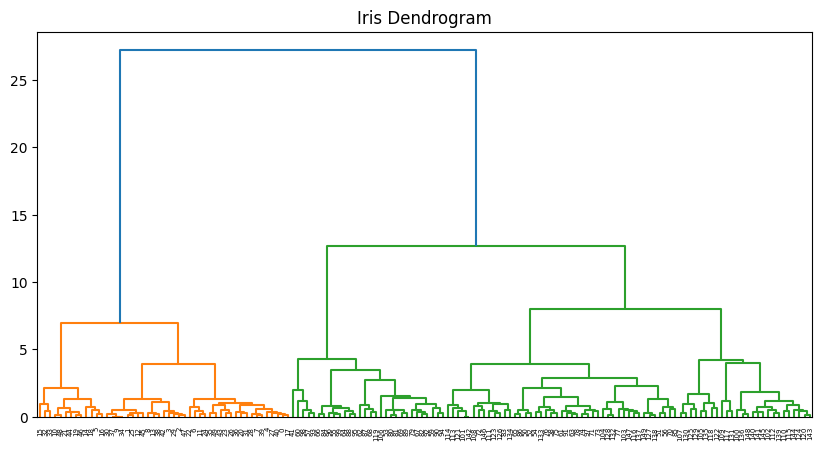

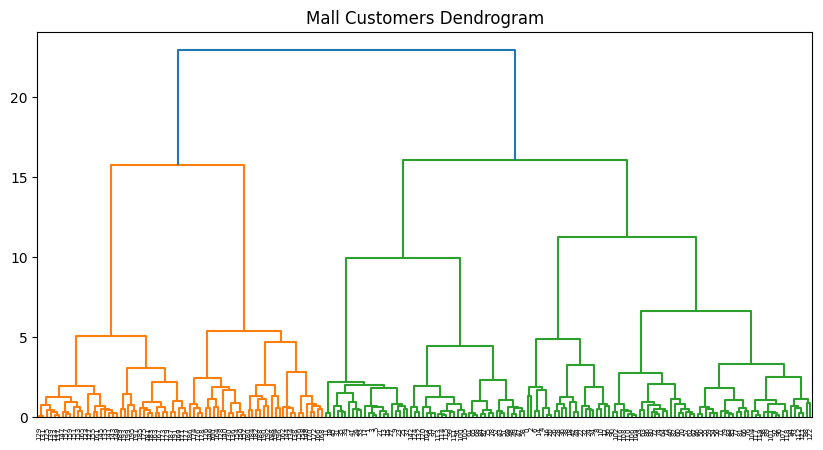

In [11]:
# Dendrogram for Iris
plt.figure(figsize=(10, 5))
link_iris = linkage(iris_scaled, method='ward')
dendrogram(link_iris)
plt.title('Iris Dendrogram')
plt.show()


# Dendrogram for Mall
plt.figure(figsize=(10, 5))
link_mall = linkage(mall_scaled, method='ward')
dendrogram(link_mall)
plt.title('Mall Customers Dendrogram')
plt.show()

In [12]:
# Agglomerative Clustering
iris_hc = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(iris_scaled)
mall_hc = AgglomerativeClustering(n_clusters=5, linkage='ward').fit(mall_scaled)


iris['HC_Cluster'] = iris_hc.labels_
mall['HC_Cluster'] = mall_hc.labels_

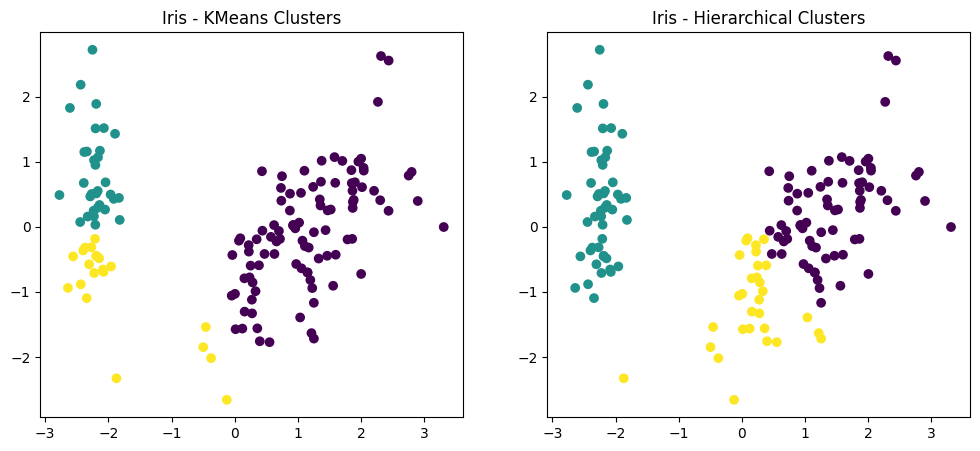

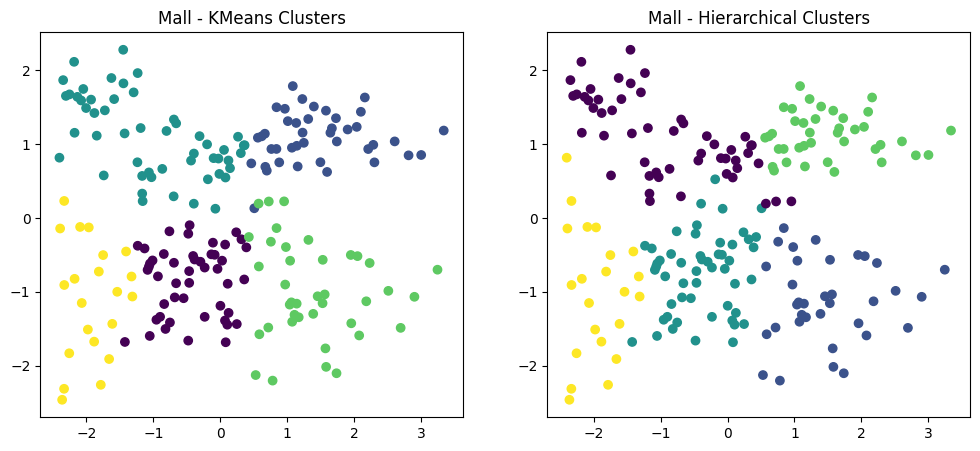

In [13]:
pca = PCA(2)
iris_pca = pca.fit_transform(iris_scaled)
mall_pca = pca.fit_transform(mall_scaled)


plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(iris_pca[:,0], iris_pca[:,1], c=iris['Cluster'])
plt.title('Iris - KMeans Clusters')


plt.subplot(1,2,2)
plt.scatter(iris_pca[:,0], iris_pca[:,1], c=iris['HC_Cluster'])
plt.title('Iris - Hierarchical Clusters')
plt.show()


plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(mall_pca[:,0], mall_pca[:,1], c=mall['Cluster'])
plt.title('Mall - KMeans Clusters')


plt.subplot(1,2,2)
plt.scatter(mall_pca[:,0], mall_pca[:,1], c=mall['HC_Cluster'])
plt.title('Mall - Hierarchical Clusters')
plt.show()

In [14]:
print('Iris KMeans Silhouette:', silhouette_score(iris_scaled, iris_kmeans.labels_))
print('Iris HC Silhouette:', silhouette_score(iris_scaled, iris_hc.labels_))
print('Mall KMeans Silhouette:', silhouette_score(mall_scaled, mall_kmeans.labels_))
print('Mall HC Silhouette:', silhouette_score(mall_scaled, mall_hc.labels_))


print('Iris KMeans DB Index:', davies_bouldin_score(iris_scaled, iris_kmeans.labels_))
print('Iris HC DB Index:', davies_bouldin_score(iris_scaled, iris_hc.labels_))
print('Mall KMeans DB Index:', davies_bouldin_score(mall_scaled, mall_kmeans.labels_))
print('Mall HC DB Index:', davies_bouldin_score(mall_scaled, mall_hc.labels_))

Iris KMeans Silhouette: 0.4787241921049546
Iris HC Silhouette: 0.44553956399200406
Mall KMeans Silhouette: 0.4272395443393026
Mall HC Silhouette: 0.41786701492690886
Iris KMeans DB Index: 0.7868006762339902
Iris HC DB Index: 0.805940469032997
Mall KMeans DB Index: 0.8262907930832972
Mall HC DB Index: 0.850547571342671


In [16]:
# Iris insights
print("\nIris Cluster Insights:")
print(iris.groupby('Cluster').mean(numeric_only=True))

# Mall insights
print("\nMall Customers Cluster Insights:")
print(mall.groupby('Cluster').mean(numeric_only=True))



Iris Cluster Insights:
         sepal_length  sepal_width  petal_length  petal_width  HC_Cluster
Cluster                                                                  
0            6.314583     2.895833      4.973958     1.703125    0.520833
1            5.178125     3.631250      1.496875     0.278125    1.000000
2            4.754545     2.904545      1.745455     0.336364    1.227273

Mall Customers Cluster Insights:
         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                      
0         82.851064  55.255319           54.063830               49.000000   
1        160.048780  32.731707           85.634146               80.902439   
2         55.365385  25.038462           41.057692               62.788462   
3        160.974359  40.333333           86.487179               19.179487   
4         23.190476  45.523810           26.285714               19.380952   

         HC_Cluster  
Clu

In [17]:
print("\nDominant Species per Cluster:")
print(iris.groupby('Cluster')['species'].agg(lambda x: x.value_counts().idxmax()))



Dominant Species per Cluster:
Cluster
0    Iris-virginica
1       Iris-setosa
2       Iris-setosa
Name: species, dtype: object


### 
K-Means performed better for both datasets based on higher silhouette and lower Davies-Bouldin scores.
For Iris, clusters align well with actual species. For Mall Customers, clusters reflect distinct spending and income groups.
Hierarchical clustering, while informative visually, was less effective in quantitative compactness.

## Summary

###
This study compared K-Means and Hierarchical Clustering on Iris and Mall Customers datasets. After EDA and dimensionality reduction, both algorithms were applied, evaluated using Silhouette and Davies-Bouldin metrics, and visualized with PCA.


K-Means provided more distinct and well-separated clusters, especially for the Iris dataset, effectively capturing species differentiation. In the Mall dataset, K-Means segmented customers based on spending score and income levels, offering actionable business insights. Hierarchical clustering was valuable for dendrogram-based analysis but exhibited less compact cluster separation.


Overall, K-Means is preferable for larger, continuous datasets, while Hierarchical Clustering suits smaller datasets where interpretability is key.